<font color='blue'> **02__________________________________ Experimental_variogram_calculation** </font> 

In [1]:
import os; import sys ; from pathlib import Path    ; _R = Path("_R")   ; _R.mkdir(exist_ok=True); TA = Path('_R/02__Experimental_variogram_calculation_'); TA.mkdir(exist_ok=True)
import numpy as np    ; import pandas as pd ; import matplotlib.pyplot as plt ; import geostatspy.GSLIB as GSLIB   ; import geostatspy.geostats as geostats     ; import geostatspy
from ipywidgets import interactive ; from ipywidgets import widgets ; from ipywidgets import Layout ; from ipywidgets import Label ; from ipywidgets import VBox, HBox
REF1 = Path('E:/15_REPOS/02_Beta-Me/data/Krig/GeostatsPy')  ; plt.rc('axes', axisbelow=True)   ; cmap = plt.cm.inferno 
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) 
def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks   

In [2]:
df = pd.read_csv(REF1/'sample_data_biased.csv') ; df = df[['X','Y','Facies','Porosity']]                                                                     
df_sand = pd.DataFrame.copy(df[df['Facies'] == 1]).reset_index(drop = True) ; df_shale = pd.DataFrame.copy(df[df['Facies'] == 0]).reset_index(drop = True); df.to_csv(TA/'01_df.csv')

In [3]:
df_sand[['Porosity']].describe().transpose()     ; df_shale[['Porosity']].describe().transpose()    

,count,mean,std,min,25%,50%,75%,max
Porosity,54.0,0.093164,0.012882,0.058548,0.084734,0.094569,0.101563,0.12277


In [4]:
df['NPor']     , tvPor    , tnsPor     =geostats.nscore(df, 'Porosity')             # all 
df_sand['NPor'], tvPorSand, tnsPorSand =geostats.nscore(df_sand, 'Porosity')        ; df_shale['NPor'], tvPorShale, tnsPorShale = geostats.nscore(df_shale, 'Porosity') 
df['NPor'].to_csv(TA/'02_df_NPor_.csv')                                             ;pd.DataFrame(tvPor).to_csv(TA/'03_tvPor.csv') ; pd.DataFrame(tnsPor).to_csv(TA/'04_tnsPor.csv') # Beta

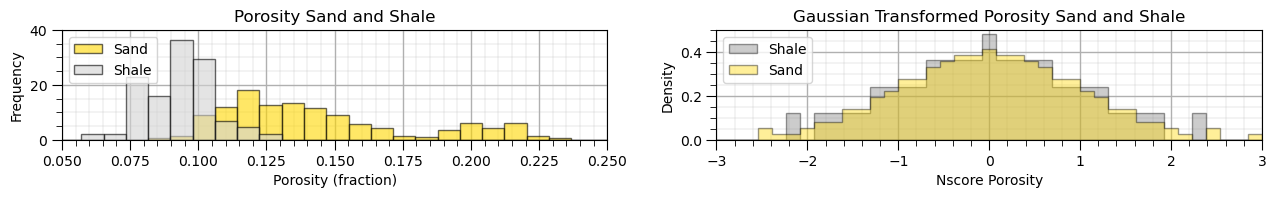

In [5]:
fig = plt.figure(figsize=(6,1)) 
plt.subplot(121)                                                              
plt.hist(df_sand['Porosity'] , facecolor='gold'     ,bins=np.linspace(0.0,0.4,50) ,alpha=0.6,density=True,edgecolor='black',label='Sand')
plt.hist(df_shale['Porosity'], facecolor='lightgrey',bins=np.linspace(0.0,0.4,50) ,alpha=0.6,density=True,edgecolor='black',label = 'Shale')
plt.xlim([0.05,0.25]); plt.ylim([0,40.0]) ; plt.xlabel('Porosity (fraction)'); plt.ylabel('Frequency'); plt.title('Porosity Sand and Shale') ; plt.legend(loc='upper left'); add_grid()

plt.subplot(122)                                             
plt.hist(df_shale['NPor'], facecolor='grey',bins=np.linspace(-3.0,3.0,40),histtype="stepfilled" ,alpha=0.4,density=True,cumulative=False,edgecolor='black',label='Shale')
plt.hist(df_sand['NPor'] , facecolor='gold',bins=np.linspace(-3.0,3.0,40),histtype="stepfilled" ,alpha=0.4,density=True,cumulative=False,edgecolor='black',label='Sand')
plt.xlim([-3.0,3.0]); plt.ylim([0,0.50])               ; plt.xlabel('Nscore Porosity'); plt.ylabel('Density'); plt.title('Gaussian Transformed Porosity Sand and Shale')  
plt.legend(loc='upper left'); add_grid()               ; plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.3)              ; plt.show()

In [6]:
df_shale[['NPor']].describe().transpose()  

,count,mean,std,min,25%,50%,75%,max
NPor,54.0,0.004663,0.986894,-2.103273,-0.660192,-8.881784e-16,0.660192,2.355084


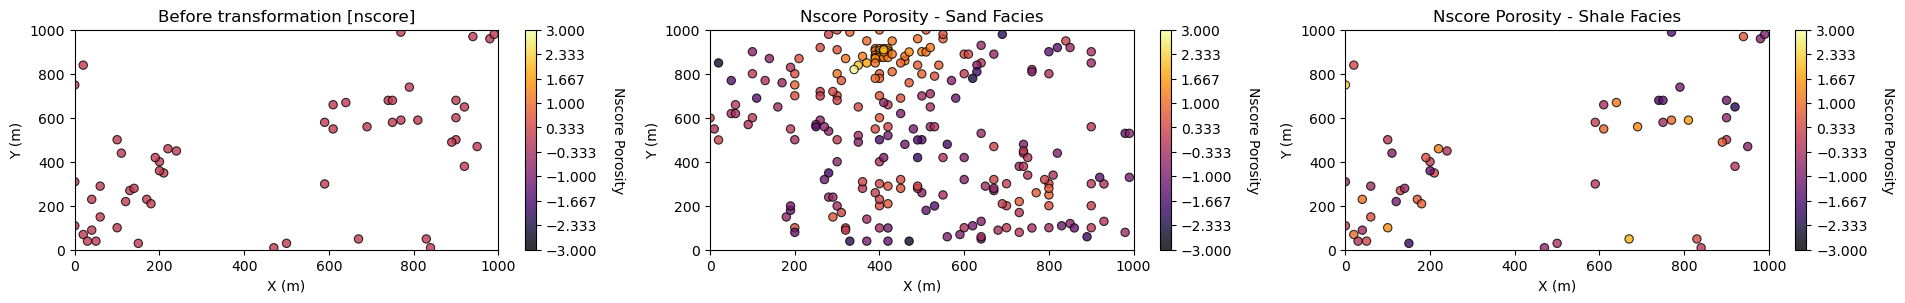

In [7]:
fig = plt.figure(figsize=(6,2))                                                                                                                             # GSLIB.locmap_st
#plt.subplot(131) ; GSLIB.locmap_st(df       ,'X','Y'   ,'NPor'    ,0,1000,0,1000,-3,3,'Nscore Porosity - All Facies'  ,'X (m)','Y (m)','Nscore Porosity',cmap)
plt.subplot(132)  ; GSLIB.locmap_st(df_sand  ,'X','Y'   ,'NPor'    ,0,1000,0,1000,-3,3,'Nscore Porosity - Sand Facies' ,'X (m)','Y (m)','Nscore Porosity',cmap)
plt.subplot(133)  ; GSLIB.locmap_st(df_shale ,'X','Y'   ,'NPor'    ,0,1000,0,1000,-3,3,'Nscore Porosity - Shale Facies','X (m)','Y (m)','Nscore Porosity',cmap)
plt.subplot(131)  ; GSLIB.locmap_st(df_shale ,'X','Y'   ,'Porosity',0,1000,0,1000,-3,3,'Before transformation [nscore]','X (m)','Y (m)','Nscore Porosity',cmap)
plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.1, wspace=0.2, hspace=0.3); plt.show()

In [8]:
tmin=-9999. ;tmax=9999.      ;lag_dist=100.0 ;lag_tol=100.0 ;nlag=20       ;bandh=9999.9 ;azi=0.0 ;atol=90.0 ;isill=1    # nlag = 10

lag, por_sand_gamma , por_sand_npair  = geostats.gamv(df_sand ,"X","Y","NPor",tmin,tmax ,lag_dist,lag_tol,nlag ,azi,atol,bandh,isill)   # geostats.gamv?
lag, por_shale_gamma, por_shale_npair = geostats.gamv(df_shale,"X","Y","NPor",tmin,tmax ,lag_dist,lag_tol,nlag ,azi,atol,bandh,isill)
lag, por_gamma      , por_npair       = geostats.gamv(df      ,"X","Y","NPor",tmin,tmax ,lag_dist,lag_tol,nlag ,azi,atol,bandh,isill)

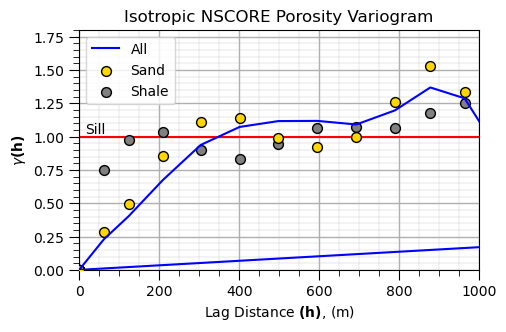

In [9]:
fig = plt.figure(figsize=(4,2))         ; P1 = por_sand_gamma ; P2 = por_shale_gamma 
#plt.scatter(lag,por_gamma,color = 'white',edgecolor='black',s=50,marker='o',label = 'All',zorder=10)   
plt.plot(lag,por_gamma ,color = 'b',label = 'All',zorder=10,  linestyle='-')
plt.scatter(lag,P1     ,color='gold',edgecolor='black',s=50,marker='o',label='Sand',zorder=9)    ;plt.scatter(lag,P2,color='grey',edgecolor='black',s=50,marker='o',label='Shale',zorder=8)

plt.plot([0,2000],[1.0,1.0]   ,color = 'r',zorder=1)   ; plt.annotate('Sill',(15,1.02)) ; plt.xlabel(r'Lag Distance $\bf(h)$, (m)'); plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Isotropic NSCORE Porosity Variogram')               ; plt.xlim([0,1000]); plt.ylim([0,1.8]); plt.legend(loc='upper left'); add_grid()
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.2, wspace=0.2, hspace=0.3) ; plt.show()

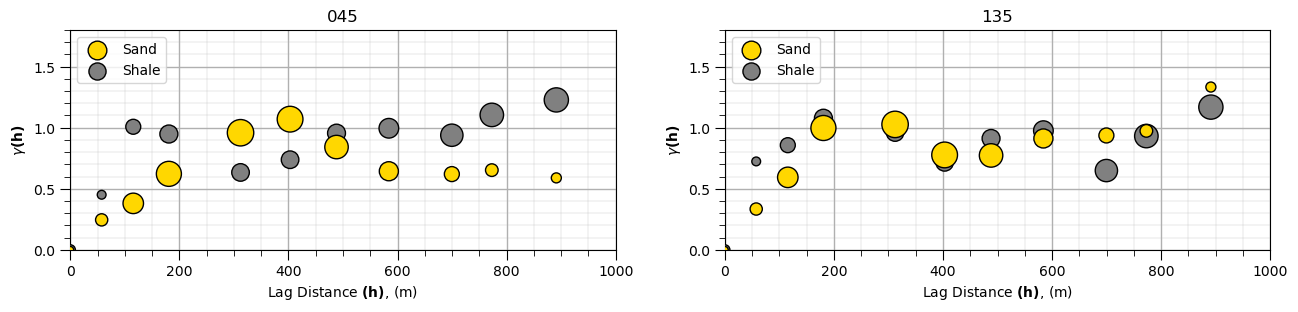

In [10]:
lag_dist = 100.0; lag_tol = 100.0; nlag = 10; bandh = 9999.9; azi = 45; atol = 22.5; isill = 1 # variogram parameters

lag, por_maj_gamma, por_maj_npair             = geostats.gamv(df       ,"X","Y","NPor",tmin,tmax,lag_dist,lag_tol,nlag,azi     ,atol,bandh,isill)
lag, por_min_gamma, por_min_npair             = geostats.gamv(df       ,"X","Y","NPor",tmin,tmax,lag_dist,lag_tol,nlag,azi+90.0,atol,bandh,isill)
lag, por_sand_maj_gamma, por_sand_maj_npair   = geostats.gamv(df_sand  ,"X","Y","NPor",tmin,tmax,lag_dist,lag_tol,nlag,azi     ,atol,bandh,isill)
lag, por_shale_maj_gamma, por_shale_maj_npair = geostats.gamv(df_shale ,"X","Y","NPor",tmin,tmax,lag_dist,lag_tol,nlag,azi     ,atol,bandh,isill)
lag, por_sand_min_gamma, por_sand_min_npair   = geostats.gamv(df_sand  ,"X","Y","NPor",tmin,tmax,lag_dist,lag_tol,nlag,azi+90.0,atol,bandh,isill)
lag, por_shale_min_gamma, por_shale_min_npair = geostats.gamv(df_shale ,"X","Y","NPor",tmin,tmax,lag_dist,lag_tol,nlag,azi+90.0,atol,bandh,isill)

fig = plt.figure(figsize=(6,2)) 
plt.subplot(121)                                             
plt.scatter(lag,por_sand_maj_gamma ,color = 'gold',edgecolor='black',s=por_sand_maj_npair/10,marker='o',label = 'Sand',zorder=9)
plt.scatter(lag,por_shale_maj_gamma,color = 'grey',edgecolor='black',s=por_shale_maj_npair,marker='o',label = 'Shale',zorder=8)
plt.xlabel(r'Lag Distance $\bf(h)$, (m)'); plt.ylabel(r'$\gamma \bf(h)$') ; plt.title('0' + str(azi)) ; plt.xlim([0,1000]); plt.ylim([0,1.8]); plt.legend(loc='upper left'); add_grid()
plt.subplot(122)                                              
plt.scatter(lag,por_sand_min_gamma ,color = 'gold',edgecolor='black',s=por_sand_maj_npair/10,marker='o',label = 'Sand',zorder=9)
plt.scatter(lag,por_shale_min_gamma,color = 'grey',edgecolor='black',s=por_shale_maj_npair,marker='o',label = 'Shale',zorder=8)
plt.xlabel(r'Lag Distance $\bf(h)$, (m)'); plt.ylabel(r'$\gamma \bf(h)$') ; plt.title(str(azi+90))  ; plt.xlim([0,1000]); plt.ylim([0,1.8]); plt.legend(loc='upper left'); add_grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.3); plt.show()

In [11]:
nug = 0.0; nst = 1                                             # 2 nest structure variogram model parameters
it1 = 1; cc1 = 1.0; azi1 = 45; hmaj1 = 500; hmin1 = 350
it2 = 0; cc2 = 0.0; azi2 = 0 ; hmaj2 = 0; hmin2 = 0

vario_porosity = GSLIB.make_variogram(nug ,nst ,it1 ,cc1 ,azi1 ,hmaj1 ,hmin1 ,it2 ,cc2 ,azi2 ,hmaj2 ,hmin2)                 # See also GAM 

 x,y,z offsets = 7.071067805519558,7.071067818211393
 x,y,z offsets = 7.071067830903227,-7.071067792827723


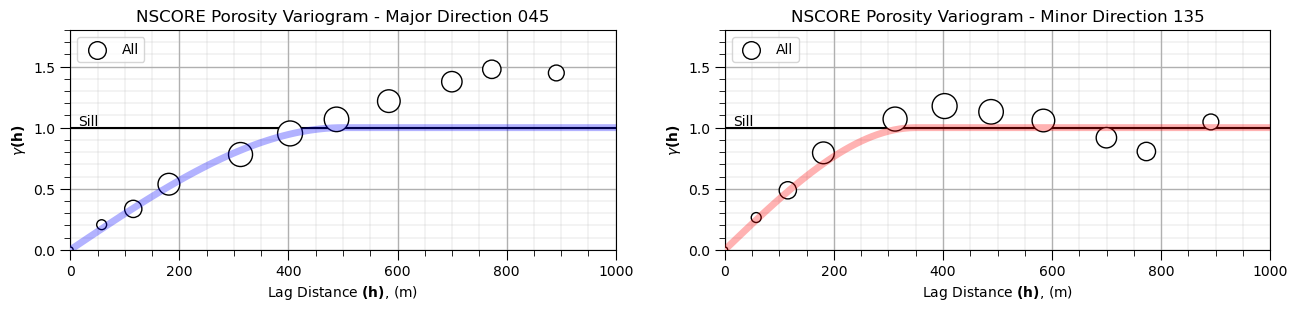

In [12]:
nlag = 100; xlag = 10; azm = 45                               # project the model in the 045 and 135 azimuth
index45,h45,gam45,cov45,ro45 = geostats.vmodel(nlag,xlag,azm,vario_porosity)  ; index135,h135,gam135,cov135,ro135 = geostats.vmodel(nlag,xlag,azm+90,vario_porosity)

fig = plt.figure(figsize=(6,2)) 
plt.subplot(121)    ; plt.scatter(lag,por_maj_gamma,color = 'white',edgecolor='black',s=por_maj_npair/17,marker='o',label = 'All',zorder=10) # _____________________________________________ 01
n='n'               ; plt.plot(h45,gam45,color='b', alpha= 0.3,lw=5,zorder=90)                                           #plt.plot(h45,gam45,color='white',lw=3,zorder=100,label = 'All Model')
plt.plot([0,2000],[1.0,1.0],color = 'black',zorder=1); plt.annotate('Sill',(15,1.02))   ; plt.xlabel(r'Lag Distance $\bf(h)$, (m)'); plt.ylabel(r'$\gamma \bf(h)$')
plt.title('NSCORE Porosity Variogram - Major Direction 0' + str(azi))                   ; plt.xlim([0,1000]); plt.ylim([0,1.8]); plt.legend(loc='upper left'); add_grid()
plt.subplot(122)    ; plt.scatter(lag,por_min_gamma,color = 'white',edgecolor='black',s=por_maj_npair/17,marker='o',label = 'All',zorder=10) # _____________________________________________ 02
n='n'               ; plt.plot(h135,gam135,color='r', alpha= 0.3,lw=5,zorder=90)                                       # plt.plot(h135,gam135,color='white',lw=3,zorder=100,label = 'All Model')
plt.plot([0,2000],[1.0,1.0],color = 'black',zorder=1); plt.annotate('Sill',(15,1.02))  ; plt.xlabel(r'Lag Distance $\bf(h)$, (m)'); plt.ylabel(r'$\gamma \bf(h)$')
plt.title('NSCORE Porosity Variogram - Minor Direction ' + str(azi+90))                ; plt.xlim([0,1000]); plt.ylim([0,1.8]); plt.legend(loc='upper left'); add_grid()
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.3); plt.show()